## Метод хорд

**Метод хорд** — итерационный численный метод приближённого нахождения корня уравнения **f(x)=0**.

<img
  src="https://upload.wikimedia.org/wikipedia/commons/b/be/Metodo_delle_secanti.gif"
  width="400"
  height="200">

Итерациоонная формула для нахождения шага:
$x_{i+1} = x_{i} - \frac{f(x_{i})(x_{i} - x_{0})}{f(x_{i}) -f(x_{0})}$

Метод секущих отличается от метода хорд тем, что в методе хорд зафиксирована одна из граничных точек(для приближенного расчета используются граничная точка и точка приближения), в отличие от метода секущих, в котором касательная к функции f(x) заменяется секущей по двум последним итерациям.

---

Критерии остановки:
1. $|x_{n} - x_{n-1}|$ < $\varepsilon$
2. $|f(x)|$ < $\varepsilon$

Линейная сходимость:
* Только если $f'(x)$ и $f''(x)$ непрерывны и сохраняют постоянные знаки, и $f'(b)f''(b)>0$ (сходится со скоростью геометрической прогрессии)
* Порядок сходимости в общем случае равен золотому сечению q = $\frac{1 + \sqrt{5}}{2}$
* Если на итренвале есть точки, где $f'(x)=0$, то метод может не сойтись 

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation

### Начальные данные

In [46]:
a = 0.0
b = 10.0
eps_array = [1.0e-3, 1.0e-6, 1.0e-9]

def func(x):
    return 4*np.sin(x/2) + np.cos(x) * np.tanh(x) - x + 2

### Нахождение корней

In [47]:
n_array = []
points_array = []
vis_points = []
first_k = []
second_k = []

In [48]:
def Chorda(a, b, eps):
    X = [b , a]
    n = 0
    while(abs(X[-1] - X[-2]) > eps):
        n += 1
        X.append(X[-1] - func(X[-1]) * (X[-1] - X[0]) / (func(X[-1]) - func(X[0])))
    f = "True"
    if(abs(func(X[-1])) < eps):
        s = "True"
    else:
        s = "False"
    return [X, n, f, s]

In [49]:
for i in range(len(eps_array)):
    temp = Chorda(a, b, eps_array[i])
    points_array.append(temp[0][-1])
    n_array.append(temp[1])
    first_k.append(temp[2])
    second_k.append(temp[3])
    if(i == 0):
        vis_points = temp[0]

In [50]:
epsilon = pd.Series(eps_array)
points = pd.Series(points_array, index = epsilon)
n_result = pd.Series(n_array, index = epsilon)
first_k = pd.Series(first_k, index = epsilon)
second_k = pd.Series(second_k, index = epsilon)

Summary = pd.DataFrame(data = {'x':points, 'N':n_result,\
                               'First':first_k,\
                               'Second':second_k},\
                      index = epsilon)

## Визуализация и результаты

In [51]:
print(Summary)

                     x   N First Second
1.000000e-03  4.792181  11  True   True
1.000000e-06  4.792777  19  True   True
1.000000e-09  4.792778  26  True   True


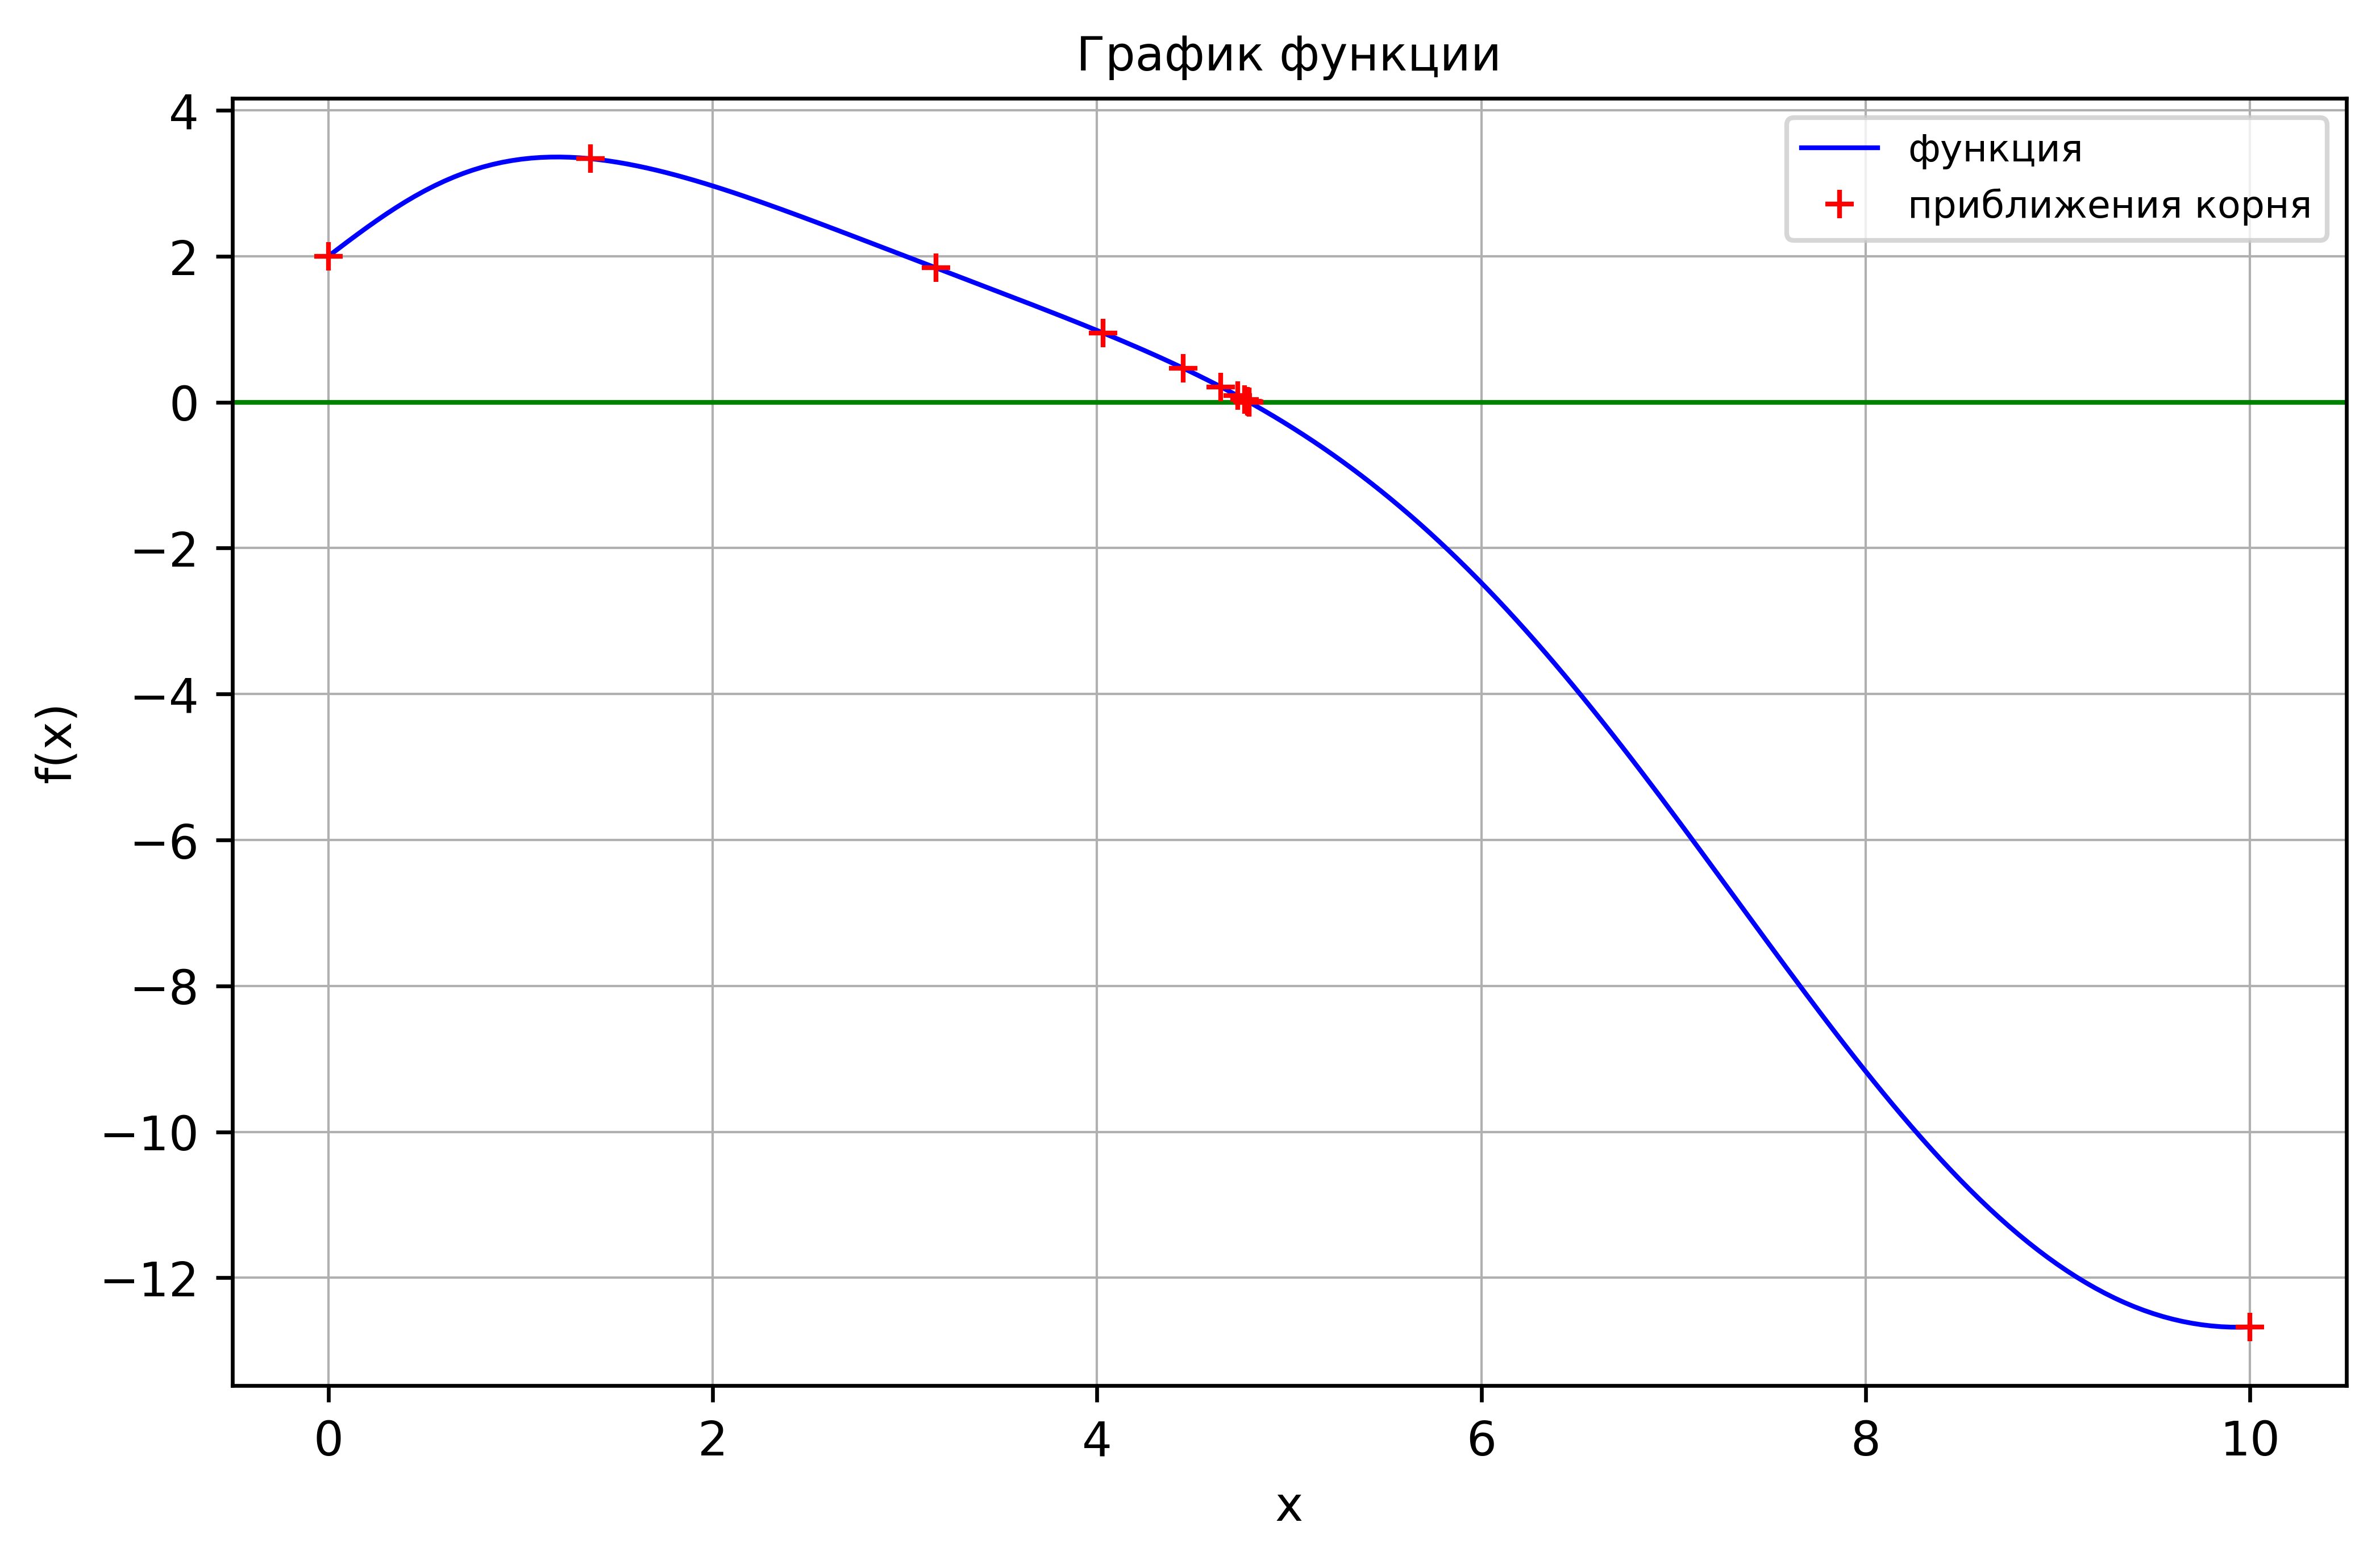

In [52]:
plt.figure(figsize = (8, 5),dpi = 600)

N_vis = 200
x_vis = np.linspace(a, b, num = N_vis)
vis_points = np.array(vis_points)

plt.plot(x_vis, func(x_vis),c = 'b', label = "функция", lw = 1.)
plt.axhline(0, c = 'g', lw = 1.)
plt.plot(vis_points, func(vis_points), '+', c = 'r',\
         label = "приближения корня", mew = 1.)

plt.xlabel('x', fontsize=10.)
plt.ylabel('f(x)', fontsize=10.)
plt.title("График функции", fontsize=10.)
plt.grid(lw = 0.5)
plt.legend(fontsize=8.)
plt.show()

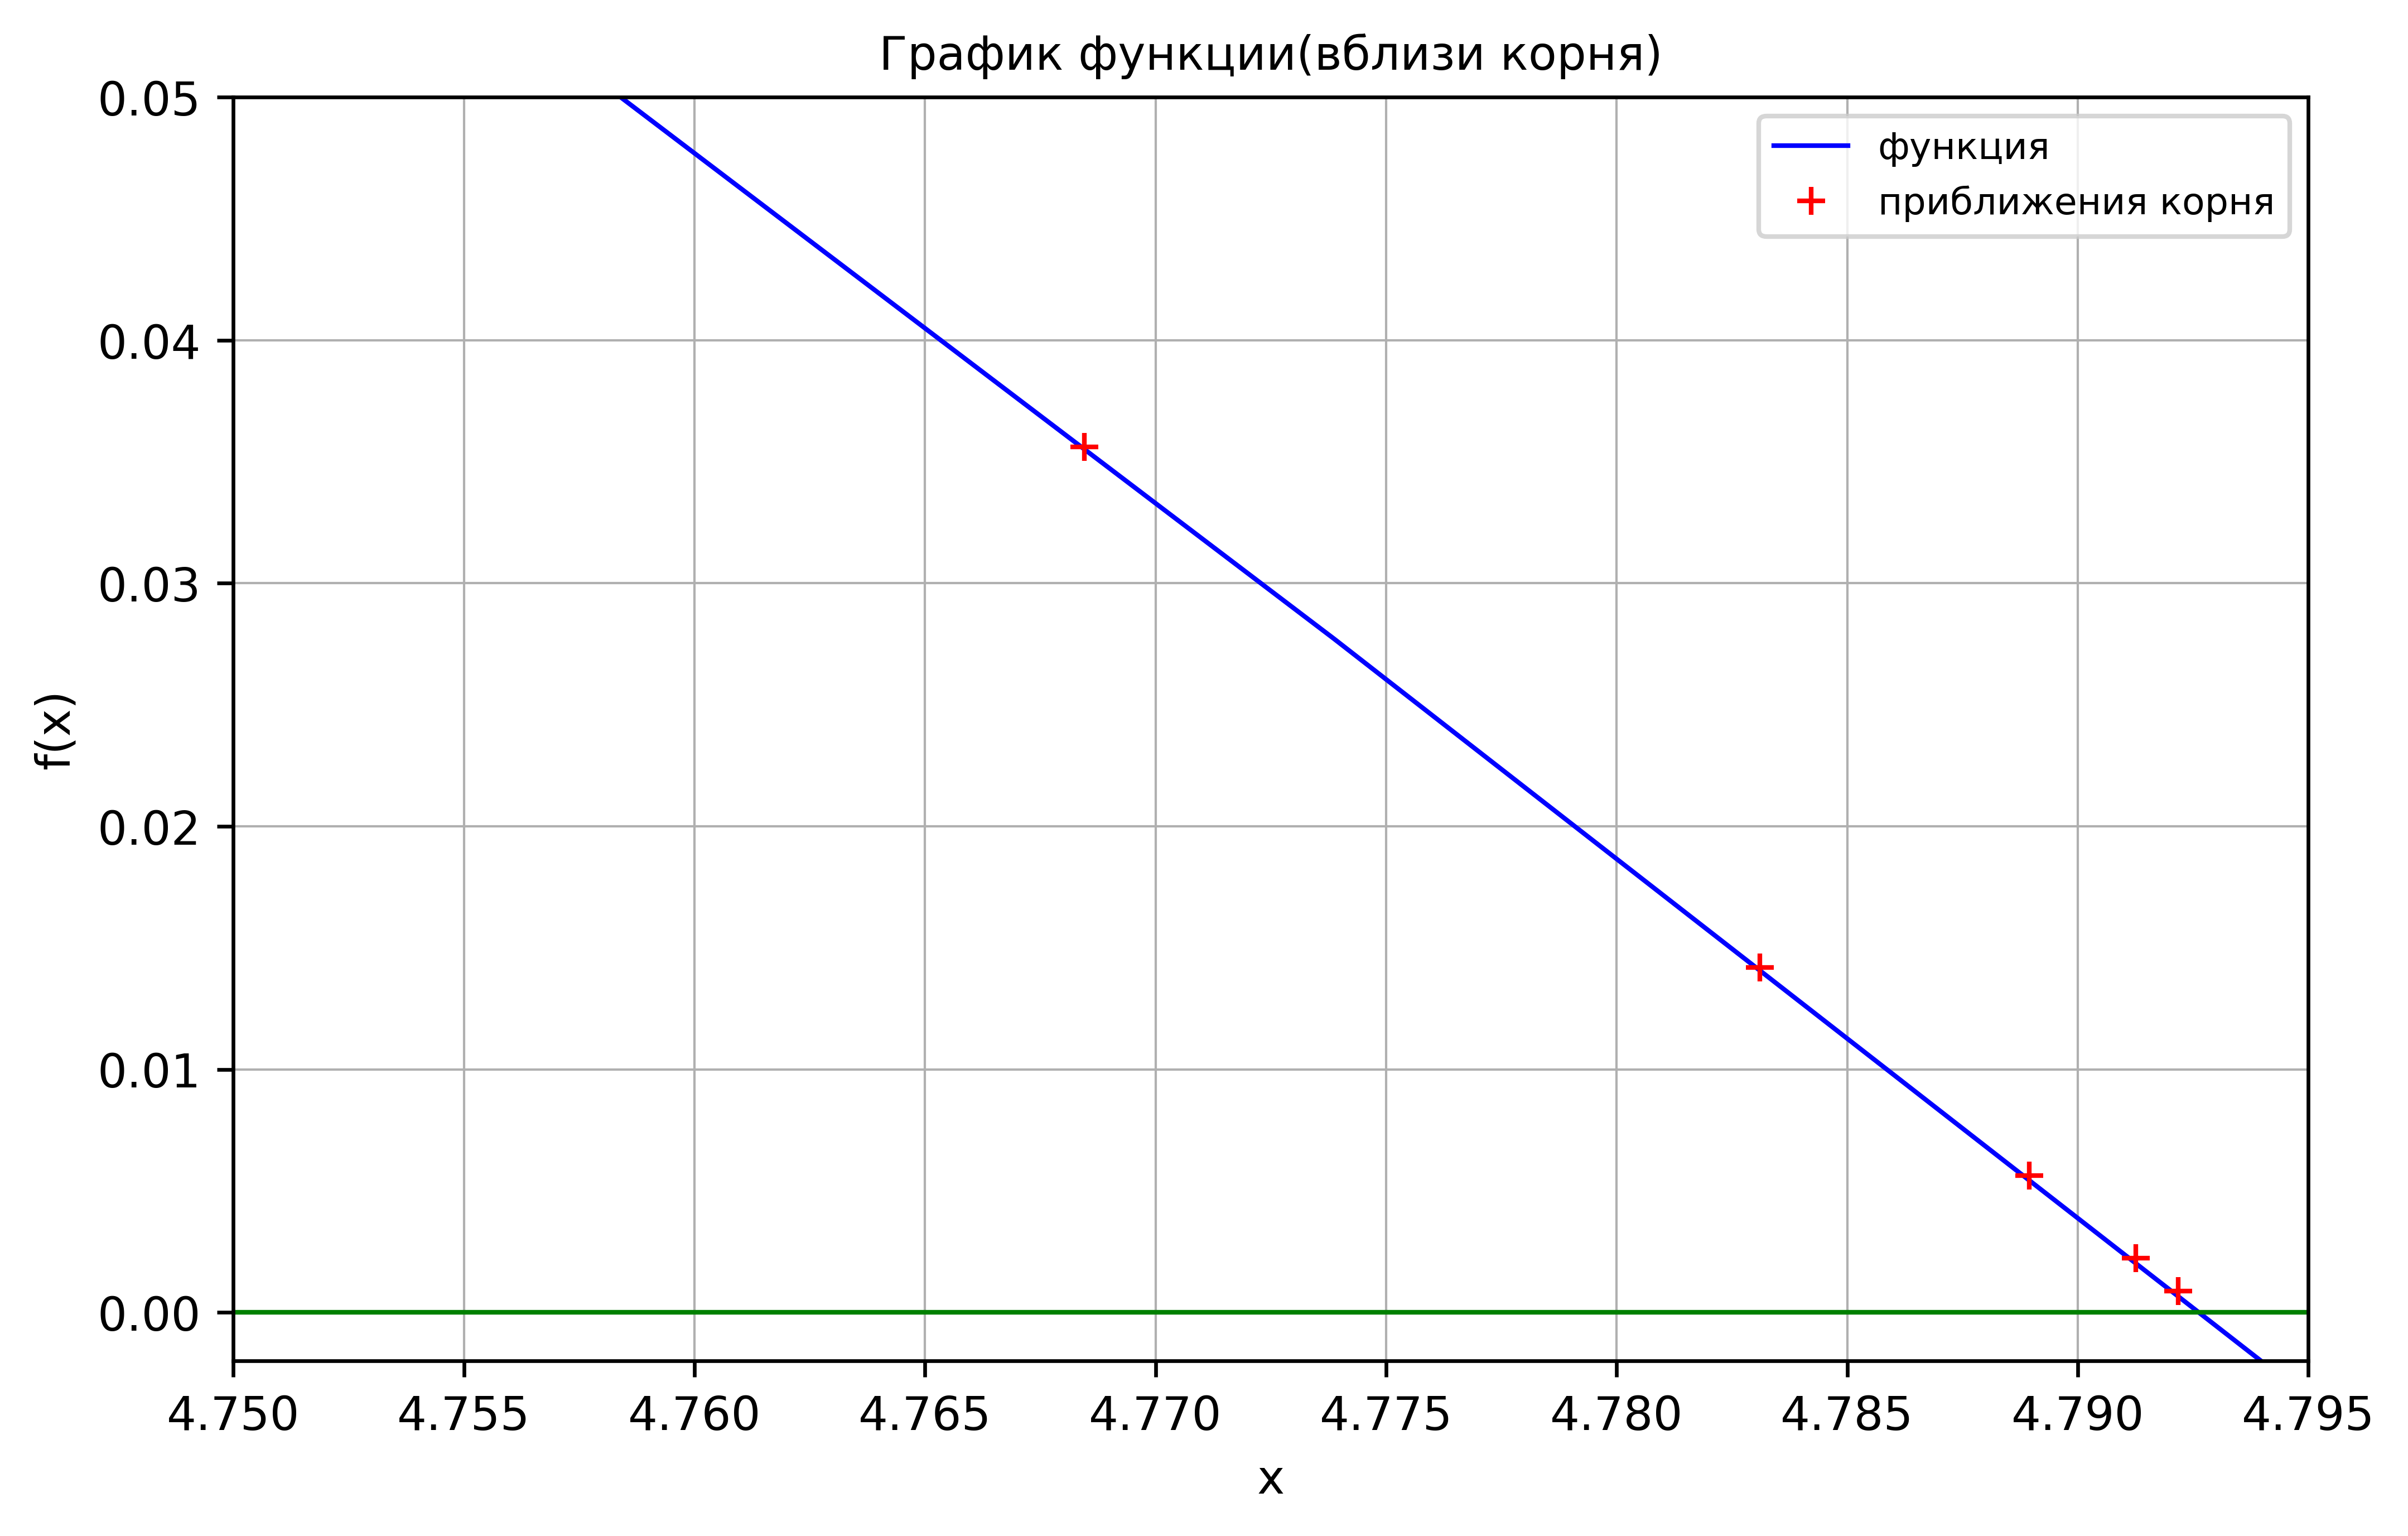

In [53]:
plt.figure(figsize = (8, 5),dpi = 600)

N_vis = 200
x_vis = np.linspace(a, b, num = N_vis)
vis_points = np.array(vis_points)

plt.plot(x_vis, func(x_vis),c = 'b', label = "функция", lw = 1.)
plt.axhline(0, c = 'g', lw = 1.)
plt.plot(vis_points, func(vis_points), '+', c = 'r',\
         label = "приближения корня", mew = 1.)

plt.xlim(4.75 ,4.795)
plt.ylim(-0.002, 0.05)

plt.xlabel('x', fontsize=10.)
plt.ylabel('f(x)', fontsize=10.)
plt.title("График функции(вблизи корня)", fontsize=10.)
plt.grid(lw = 0.5)
plt.legend(fontsize=8.)
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


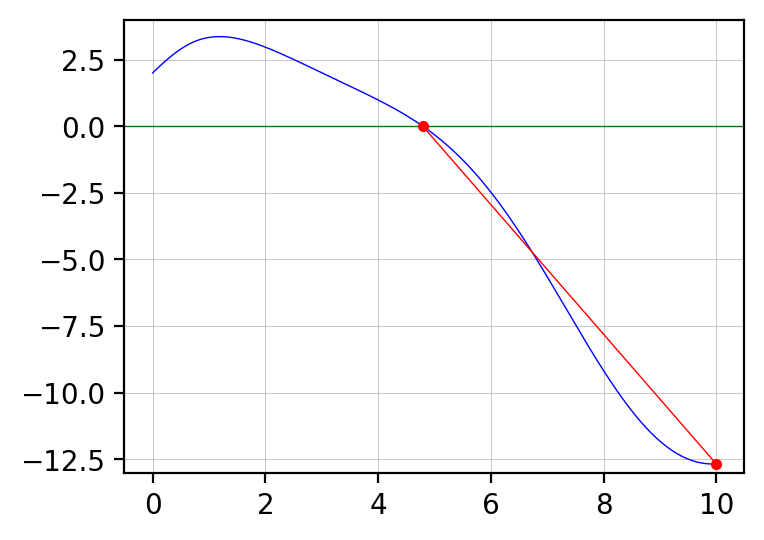

In [54]:
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams["figure.dpi"] = 200
plt.rcParams["figure.figsize"] = (4, 3)

fig, ax = plt.subplots()

plt.grid(lw = 0.5)

def animate(i):
    ax.cla()
    ax.plot(x_vis, func(x_vis),c = 'b', lw = 0.5)
    ax.axhline(0, c = 'g', lw = 0.5)
    ax.plot([vis_points[i], b], [func(vis_points[i]), func(b)],\
            marker = '.', c = 'r', lw = 0.5)
    ax.grid(lw = 0.25)
    ax.set_xlim(-0.5 ,10.5)
    ax.set_ylim(-13, 4)
    ax.set_xlabel('', fontsize=2.)
    ax.set_ylabel('', fontsize=2.)

anim = matplotlib.animation.FuncAnimation(fig, animate, frames=n_array[0])

anim.save('chord_method.gif', fps = 2)

## Пример, при котором метод расходится

In [55]:
a = 0.0
b = 10.0

def func(x):
    return -0.5 * x**2 + 6 * x - 8

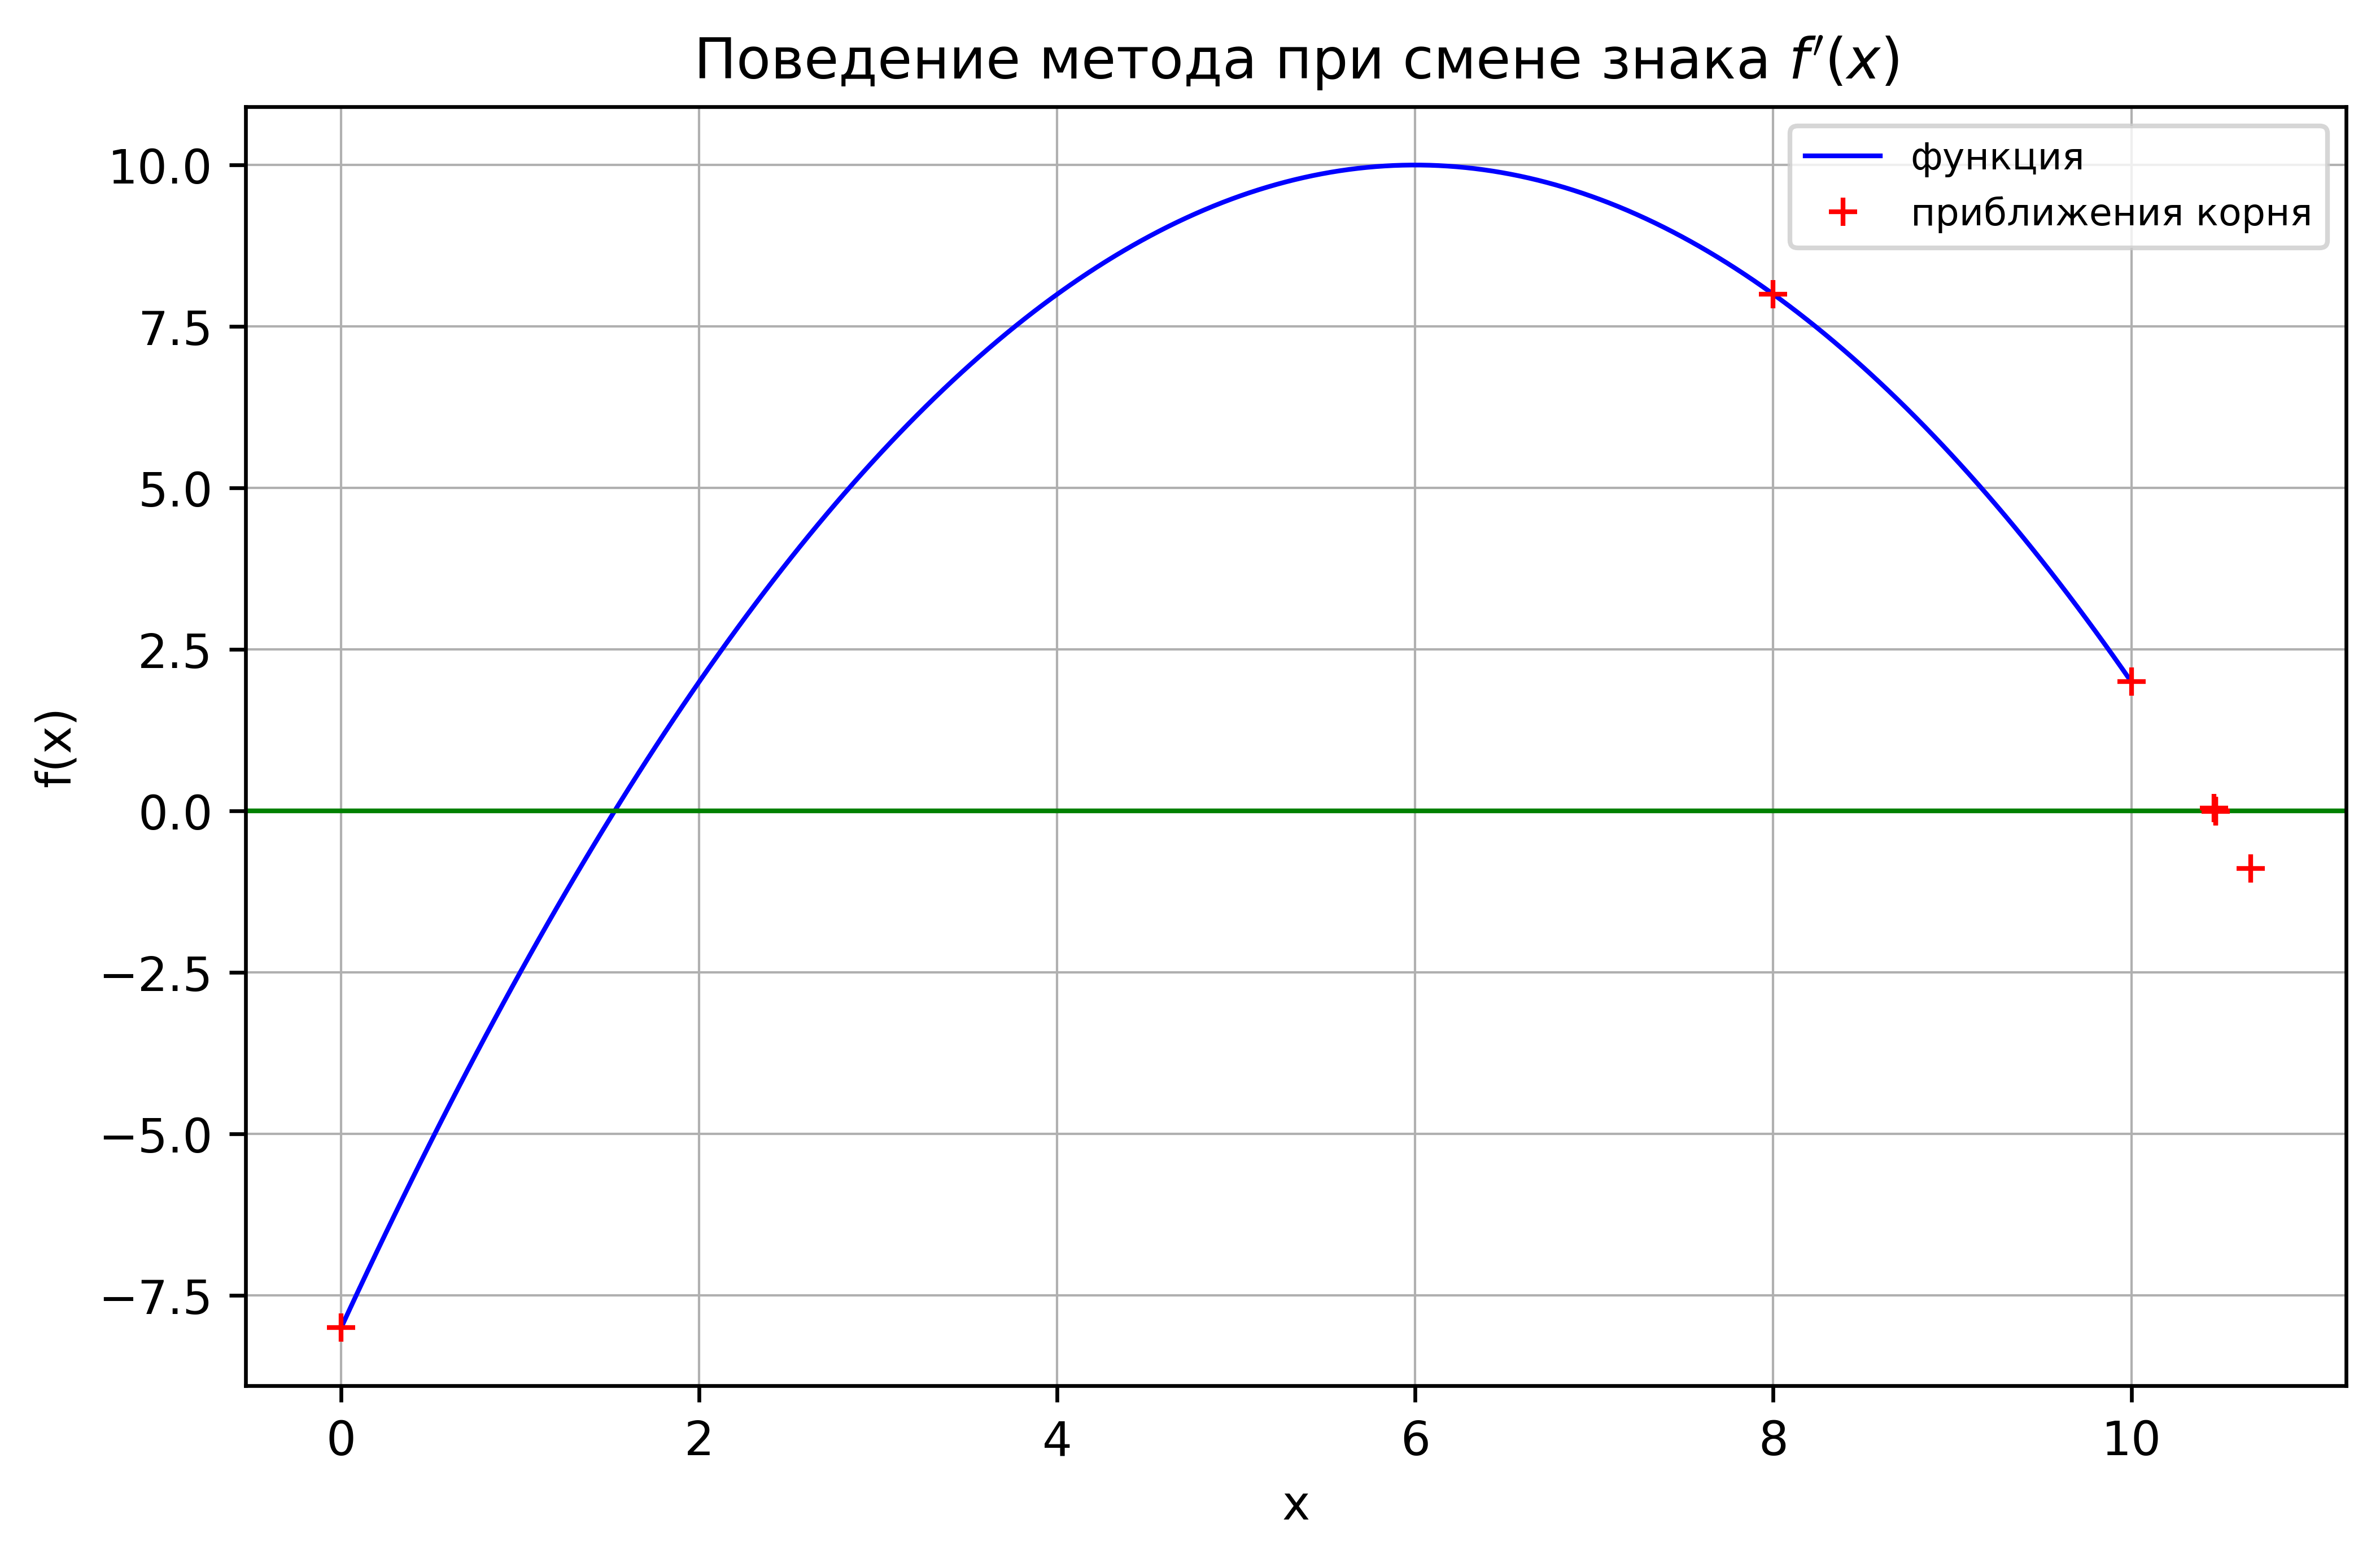

Корень:  10.472103004291844


In [56]:
plt.figure(figsize = (8, 5),dpi = 600)

N_vis = 200
x_vis = np.linspace(a, b, num = N_vis)

temp = Chorda(a, b, eps_array[0])
vis_points = np.array(temp[0])

plt.plot(x_vis, func(x_vis),c = 'b', label = "функция", lw = 1.)
plt.axhline(0, c = 'g', lw = 1.)
plt.plot(vis_points, func(vis_points), '+', c = 'r',\
         label = "приближения корня", mew = 1.)

plt.xlabel('x', fontsize=10.)
plt.ylabel('f(x)', fontsize=10.)
plt.title("Поведение метода при смене знака $f'(x)$", fontsize=12.)
plt.grid(lw = 0.5)
plt.legend(fontsize=8.)
plt.show()

print("Корень: ", temp[0][-1])